# Digits Menge erzeugen

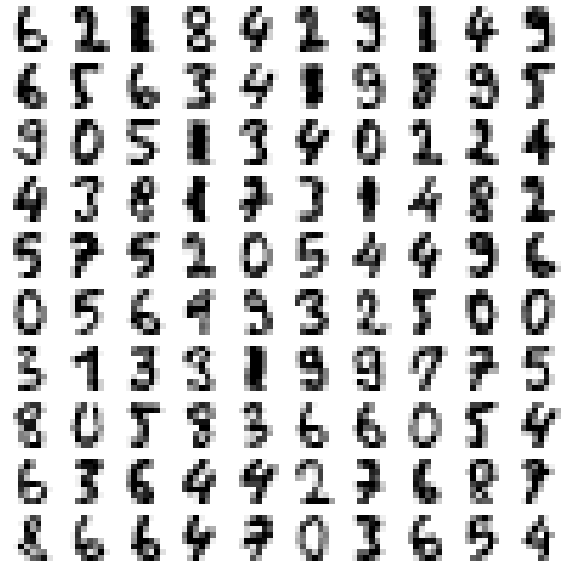

In [134]:
from sklearn.datasets import load_digits
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np

# Handschriftenerkennung laden
X, y = load_digits(return_X_y=True)
images = X[np.random.choice(len(X), 100, replace=False)]

# Bilder anzeigen
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
ax = axes.ravel()
for i, image in enumerate(images):
    ax[i].imshow(1 - image.reshape([8, 8]), cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()
plt.show()


# Neuronales Netzwerk trainieren

In [135]:
import csv
from neural_network import NeuralNetwork
from random import shuffle

with open('digits.csv', 'r') as digits_file:
    reader = csv.reader(digits_file, quoting=csv.QUOTE_NONNUMERIC)
    digits = list(reader)
shuffle(digits)
network = NeuralNetwork(64, 256, 10, learning_rate=0.005)
x_test, y_test, x_train, y_train = network.prepare(digits, test_ratio=0.1)
for i in range(300):
    network.train(x_train, y_train)
correct, percent = network.predict(x_test, targets=y_test)
print(f"{correct} korrekte Vorhersagen ({percent}%).")


147 korrekte Vorhersagen (82.12290502793296%).


## Nun ein Bild nehmen

In [136]:
image = X[np.random.choice(len(X), 1, replace=False)]
image[0]

array([ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12.,
       12., 10.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
       12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  2.,  0.,
        0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11.,
       15.,  2.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.])

In [137]:
a = np.array(image[0])
data=a.reshape((8, -1))
data

array([[ 0.,  0., 15., 12., 11.,  6.,  2.,  0.],
       [ 0.,  4., 16., 15., 12., 12., 10.,  0.],
       [ 0.,  7., 14.,  1.,  0.,  0.,  0.,  0.],
       [ 0., 10., 12.,  3.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  2.,  0.,  0.],
       [ 0.,  1.,  8.,  8., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  2.,  0.,  0.],
       [ 0.,  0., 13., 16.,  6.,  0.,  0.,  0.]])

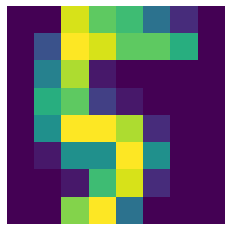

In [138]:
plt.imshow(data, interpolation='none')
plt.axis('off')
plt.show()

# Vorhersage des neuronalen Netzwerkes

In [139]:
network.predict(image)

[5.0]

# Testen mit selbst gezeichneten Bild

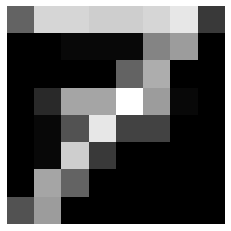

In [140]:
import matplotlib.image as mpimg

img = mpimg.imread('sieben.tif')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [141]:
img

array([[[ 99,  99,  99, 255],
        [214, 214, 214, 255],
        [214, 214, 214, 255],
        [206, 206, 206, 255],
        [206, 206, 206, 255],
        [214, 214, 214, 255],
        [231, 231, 231, 255],
        [ 57,  57,  57, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  8,   8,   8, 255],
        [  8,   8,   8, 255],
        [  8,   8,   8, 255],
        [132, 132, 132, 255],
        [156, 156, 156, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [ 99,  99,  99, 255],
        [173, 173, 173, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [ 41,  41,  41, 255],
        [165, 165, 165, 255],
        [165, 165, 165, 255],
        [255, 255, 255, 255],
        [156, 156, 156, 255],
        [  8,   8,   8, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
  

# Daten umwandeln damit ein eindimensionales Arrays mit den Werten 0 bis 15 entsteht

In [142]:
cdata =[]
for x in img:
    for y in x:
        cdata.append(int(y[0]/16))
npdata=np.array(cdata)
npdata

array([ 6, 13, 13, 12, 12, 13, 14,  3,  0,  0,  0,  0,  0,  8,  9,  0,  0,
        0,  0,  0,  6, 10,  0,  0,  0,  2, 10, 10, 15,  9,  0,  0,  0,  0,
        5, 14,  4,  4,  0,  0,  0,  0, 12,  3,  0,  0,  0,  0,  0, 10,  6,
        0,  0,  0,  0,  0,  5,  9,  0,  0,  0,  0,  0,  0])

# ... und vorhersagen

In [143]:
network.predict(npdata)

[7.0]